In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
font = {'size'   : 14}

plt.rc('font', **font)

In [18]:
original = pd.read_csv('original.csv')
hybrid = pd.read_csv('plog_hybrid_n4_N1-new5.csv')

In [19]:
df = []
for i in range(5):
    L = []
    for j in range(15):
        L.append(hybrid['filters_time'][i*15+j])
    df.append(L)
hybrid = np.array(df)

In [22]:
header = list(original.keys())[:-1]

In [23]:
header

['import_time',
 'gray_time',
 'blur_time',
 'sobel_time',
 'filters_time',
 'export_time']

In [25]:
# into np.array
original = np.array(original)

In [26]:
df_origin = np.zeros((20,0))

for i in range(15):
    df_origin = np.concatenate([df_origin, np.array(original)[i::15,4][np.newaxis].T], axis=-1)
df_origin = pd.DataFrame(df_origin)

In [33]:
df_origin.shape, hybrid.shape

((20, 15), (5, 15))

In [30]:
speed_up = []
for i in range(15):
    speed_up.append(df_origin.mean()[i]/ hybrid.mean(axis=0)[i])


In [31]:
speed_up

[0.46686762318329567,
 1.6797665306376397,
 0.07340343829385004,
 1.3289132221808542,
 0.26957615298397847,
 2.5475091877478775,
 2.307923776305545,
 0.07212867728378676,
 0.21844106170668892,
 0.9002359490534697,
 0.5822334254205679,
 0.15981327366465156,
 0.2815907676049651,
 1.365329692455232,
 1.725038992284779]

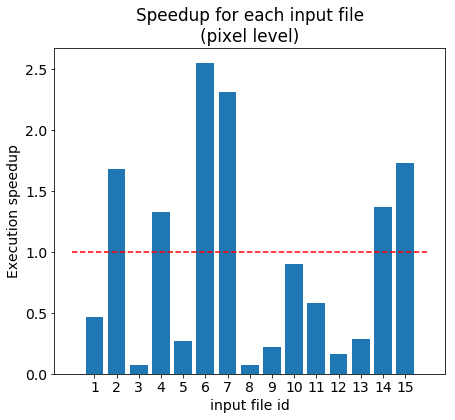

In [32]:
fig, ax = plt.subplots(figsize=(7,6))
ax.bar(np.arange(len(speed_up)), speed_up)
ax.hlines(1, -1, 15, 'r', linestyles='dashed')
ax.set_xticks(np.arange(0,15));
ax.set_xticklabels(np.arange(1,16));
ax.set_title('Speedup for each input file\n(pixel level)');
ax.set_xlabel('input file id');
ax.set_ylabel('Execution speedup');